In [1]:
import yfinance as yf
import pandas as pd
import random
import numpy as np

In [2]:
class Volume:
    def __init__(self, value: float):
        self.value = value

class Dollar:
    def __init__(self, value: float):
        self.value = value


In [ ]:
btc_ts = yf.Ticker("BTC-USD").history(start='2016-01-01', end='2021-12-31')
btc_ts_test = yf.Ticker("BTC-USD").history(start='2022-01-01', end='2023-06-31')

btc_ts_open = btc_ts['Open']
btc_ts.head(5)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900,0.0,0.0
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600,0.0,0.0
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800,0.0,0.0
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500,0.0,0.0
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600,0.0,0.0


In [4]:
base_columns_list = ['Open', 'High', 'Low', 'Close', 'Volume']
# btc_ts = btc_ts[base_columns_list]

# base_column_mapping = {}
# for i in base_columns_list:
#     base_column_mapping[i]=i.lower()
# btc_ts = btc_ts.rename(columns = base_column_mapping)
# btc_ts.head(5)
# base_columns_list = [i.lower() for i in base_columns_list]

In [5]:
def create_ma_columns(df,column, lag):
    df[f"ma_{column.lower()}_{lag}"]= df[column].rolling(window = lag).mean()
    return df

def create_lagged_columns(df, column, lag):
    df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
    return df

def create_percentage_of_value(df, column, percentage:float = random.random()):
    df[f"percentage_{column.lower()}_{(round(percentage*100))}"]= df[column]*percentage
    return df

def create_difference(df, column1:str = "low", column2:str = "high"):
    df[f"difference_{column1.lower()}_{column2.lower()}"]= df[column2]-df[column1]
    return df

In [6]:
# Add columns to df:
for column in base_columns_list:
    for lag in range(2,50):
        create_ma_columns(df = btc_ts,column=column, lag = lag)
    for lag in range(1,50):
        create_lagged_columns(df = btc_ts,column=column, lag = lag)
    for lag in range(10):
        create_percentage_of_value(df = btc_ts,column=column)

C:\Users\khann\AppData\Local\Temp\ipykernel_14632\3535242035.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
C:\Users\khann\AppData\Local\Temp\ipykernel_14632\3535242035.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
C:\Users\khann\AppData\Local\Temp\ipykernel_14632\3535242035.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [7]:
btc_ts


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma_open_2,ma_open_3,ma_open_4,...,lag_volume_41,lag_volume_42,lag_volume_43,lag_volume_44,lag_volume_45,lag_volume_46,lag_volume_47,lag_volume_48,lag_volume_49,percentage_volume_70
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.546152e+07
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600,0.0,0.0,432.671509,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.112262e+07
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800,0.0,0.0,434.100006,432.973674,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.781608e+07
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500,0.0,0.0,431.819504,432.753672,432.245506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700456e+07
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600,0.0,0.0,431.565002,432.236003,432.832504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.422890e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26 00:00:00+00:00,50428.691406,51196.378906,49623.105469,50809.515625,20964372926,0.0,0.0,50641.804688,50696.553385,50179.000977,...,3.055876e+10,2.512209e+10,3.047423e+10,3.608489e+10,3.588063e+10,4.873083e+10,4.235799e+10,4.112561e+10,2.472675e+10,1.471337e+10
2021-12-27 00:00:00+00:00,50802.609375,51956.328125,50499.468750,50640.417969,24324345758,0.0,0.0,50615.650391,50695.406250,50723.067383,...,4.684434e+10,3.055876e+10,2.512209e+10,3.047423e+10,3.608489e+10,3.588063e+10,4.873083e+10,4.235799e+10,4.112561e+10,1.707149e+10
2021-12-28 00:00:00+00:00,50679.859375,50679.859375,47414.210938,47588.855469,33430376883,0.0,0.0,50741.234375,50637.053385,50691.519531,...,3.917839e+10,4.684434e+10,3.055876e+10,2.512209e+10,3.047423e+10,3.608489e+10,3.588063e+10,4.873083e+10,4.235799e+10,2.346235e+10


In [8]:
btc_ts[50:][btc_ts[50:].notna()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma_open_2,ma_open_3,ma_open_4,...,lag_volume_41,lag_volume_42,lag_volume_43,lag_volume_44,lag_volume_45,lag_volume_46,lag_volume_47,lag_volume_48,lag_volume_49,percentage_volume_70
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-20 00:00:00+00:00,421.601013,441.984009,421.601013,437.164001,93992096,0.0,0.0,422.165512,420.301005,417.139755,...,3.599590e+07,3.227800e+07,5.699300e+07,8.756220e+07,3.404250e+07,3.452260e+07,3.847750e+07,3.963380e+07,3.009660e+07,6.596622e+07
2016-02-21 00:00:00+00:00,437.773010,448.045990,429.076996,438.798004,89820704,0.0,0.0,429.687012,427.368011,424.669006,...,4.045000e+07,3.599590e+07,3.227800e+07,5.699300e+07,8.756220e+07,3.404250e+07,3.452260e+07,3.847750e+07,3.963380e+07,6.303862e+07
2016-02-22 00:00:00+00:00,438.989014,439.045013,432.916992,437.747986,85385200,0.0,0.0,438.381012,432.787679,430.273262,...,1.156070e+08,4.045000e+07,3.599590e+07,3.227800e+07,5.699300e+07,8.756220e+07,3.404250e+07,3.452260e+07,3.847750e+07,5.992567e+07
2016-02-23 00:00:00+00:00,438.255005,439.858002,417.821014,420.735992,85244896,0.0,0.0,438.622009,438.339010,434.154510,...,1.738880e+08,1.156070e+08,4.045000e+07,3.599590e+07,3.227800e+07,5.699300e+07,8.756220e+07,3.404250e+07,3.452260e+07,5.982720e+07
2016-02-24 00:00:00+00:00,420.955994,425.549988,413.907013,424.954987,67743696,0.0,0.0,429.605499,432.733337,433.993256,...,4.394550e+07,1.738880e+08,1.156070e+08,4.045000e+07,3.599590e+07,3.227800e+07,5.699300e+07,8.756220e+07,3.404250e+07,4.754438e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26 00:00:00+00:00,50428.691406,51196.378906,49623.105469,50809.515625,20964372926,0.0,0.0,50641.804688,50696.553385,50179.000977,...,3.055876e+10,2.512209e+10,3.047423e+10,3.608489e+10,3.588063e+10,4.873083e+10,4.235799e+10,4.112561e+10,2.472675e+10,1.471337e+10
2021-12-27 00:00:00+00:00,50802.609375,51956.328125,50499.468750,50640.417969,24324345758,0.0,0.0,50615.650391,50695.406250,50723.067383,...,4.684434e+10,3.055876e+10,2.512209e+10,3.047423e+10,3.608489e+10,3.588063e+10,4.873083e+10,4.235799e+10,4.112561e+10,1.707149e+10
2021-12-28 00:00:00+00:00,50679.859375,50679.859375,47414.210938,47588.855469,33430376883,0.0,0.0,50741.234375,50637.053385,50691.519531,...,3.917839e+10,4.684434e+10,3.055876e+10,2.512209e+10,3.047423e+10,3.608489e+10,3.588063e+10,4.873083e+10,4.235799e+10,2.346235e+10


In [9]:
null_rows = btc_ts.isna().sum(axis=1)[btc_ts.isna().sum(axis=1)!=0]
null_row_indices = list(null_rows.index)

In [10]:
btc_ts.drop(null_row_indices,inplace=True)

In [11]:
btc_ts.isna().sum(axis=1)

Date
2016-02-19 00:00:00+00:00    0
2016-02-20 00:00:00+00:00    0
2016-02-21 00:00:00+00:00    0
2016-02-22 00:00:00+00:00    0
2016-02-23 00:00:00+00:00    0
                            ..
2021-12-26 00:00:00+00:00    0
2021-12-27 00:00:00+00:00    0
2021-12-28 00:00:00+00:00    0
2021-12-29 00:00:00+00:00    0
2021-12-30 00:00:00+00:00    0
Length: 2142, dtype: int64

In [12]:
volume_columns = [col  for col in btc_ts.columns if "volume" in col.lower()]
dollar_columns = [col  for col in btc_ts.columns if "volume" not in col.lower()]

In [13]:
# #Convert contents of columns to their types:
# btc_ts_volume = btc_ts[volume_columns].map(lambda x: Volume(x))
# btc_ts_dollar = btc_ts[dollar_columns].map(lambda x: Dollar(x))
# # btc_ts2 = pd.join([btc_ts_dollar, btc_ts_volume])
# btc_ts2 = btc_ts_dollar.join( btc_ts_volume)

In [14]:
# #Drop null rows in the DF after adding in columns:
# btc_ts2.drop(btc_ts2.isnull().index, inplace=True)
# btc_ts2.isnull().count().sum()

In [15]:
btc_ts1= btc_ts.copy()

# Genetic Program

In [16]:
from deap import gp, creator, base, tools
import operator
from operator import or_, and_, gt
from fitness_functions import *

In [17]:
arg_names = list(btc_ts1.columns)
vol_args = [arg for arg in arg_names if "volume" in arg.lower()]
dol_args = [arg for arg in arg_names if "volume" not in arg.lower()]

In [18]:
n_args=len(arg_names)
pset = gp.PrimitiveSetTyped("main",[Volume]*len(vol_args) + [Dollar]*len(dol_args),bool)
#Rename the arguments:
arg_vol_mapping = {f"ARG{ind}": val for ind,val in enumerate(vol_args)}
pset.renameArguments(**arg_vol_mapping)
arg_vol_mapping = {f"ARG{len(vol_args)+ind}": val for ind,val in enumerate(dol_args)}

pset.renameArguments(**arg_vol_mapping)
#Check that all arguments were renamed:
unnamed_args=[i for i in pset.arguments if "ARG" in i]
if  unnamed_args:
    print(f"Some arguments were not renamed: {unnamed_args}")
# pset.addPrimitive(operator.lt, [float,float],bool)
pset.addPrimitive(gt, [Dollar,Dollar],bool)
pset.addPrimitive(lambda x:x ,[Dollar],Dollar, name="dollar placeholder")

pset.addPrimitive(gt, [Volume,Volume],bool)
pset.addPrimitive(lambda x:x ,[Volume],Volume, name="volume placeholder")


#Boolean operators:
pset.addPrimitive(and_, [bool,bool],bool)
pset.addPrimitive(or_,[bool,bool],bool)

# pset.addTerminal(True,bool)
pset.addTerminal("ARG1",float)
# pset.addTerminal(False,bool)
for v_arg in vol_args:
        pset.addTerminal(v_arg,Volume)
for d_arg in dol_args:
        pset.addTerminal(d_arg,Dollar)

def plot_tree(expr, name:str = "tree"):
    nodes, edges, labels = gp.graph(expr)

    ### Graphviz Section ###
    import pygraphviz as pgv

    g = pgv.AGraph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    g.layout(prog="dot")

    for i in nodes:
        n = g.get_node(i)
        n.attr["label"] = labels[i]

    g.draw(f"{name}.png")

In [19]:
def generate(pset):
    run=True
    while run:
        try:
            expr = toolbox.individual()            
            #Remove all the Lambda functions:
            expr=  list(filter(lambda x: x.name!="dollar placeholder", expr))
            expr=  list(filter(lambda x: x.name!="volume placeholder", expr))
            if len(expr)>3:
                run=False
        except IndexError:
            continue
    # return gp.PrimitiveTree(expr)
    return creator.Individual(expr)

In [20]:
creator.create("fitness", base.Fitness, weights=(1,))
creator.create("Individual", gp.PrimitiveTree, fitness= creator.fitness)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("custom_individual",generate, pset)
toolbox.register("population", tools.initRepeat, list, toolbox.custom_individual)

expr1 = toolbox.custom_individual()
expr1

plot_tree(expr1)

In [21]:
ind = gp.PrimitiveTree(expr1)

In [22]:
pop = toolbox.population(n=100)
pop

[[<deap.gp.Primitive at 0x2208f1c2b60>,

In [23]:
ind = gp.PrimitiveTree(pop[0])
str(ind)

"and_(gt('lag_high_44', ma_high_32), gt('lag_volume_21', 'lag_volume_20'))"

In [24]:
function = gp.compile(expr=gp.PrimitiveTree(expr1),pset=pset)
function

<function <lambda>(df)>

#Get all the names of the arguments in the function, used in gp.py code:

## Method 1:
args_in_func=[]
for components in [i.name for i in expr]:
    if "ARG" in components:
        args_in_func.append(pset.arguments[int(components.replace("ARG",""))])
args_in_func = args_in_func + [a for a in [i.name for i in expr] if a in pset.arguments or a in pset.terminals]
args_in_func

##Method 2:
arg_in_func=[]
for arg in [ter for ter in [i.name for i in tree] if ter not in ["and_","or_","gt"]]+["volume"]:
    if "ARG" in arg:
        arg_in_func.append(pset.arguments[int(arg.replace("ARG",""))])
    else:
        arg_in_func.append(arg)

# Edit code to take values from DF:
code = str(tree).replace("'","")

for i in args_in_func:
    code = code.replace(i, f"df['{i}']")
code

## Create the Signal DF:

In [25]:
signal_df  = pd.DataFrame(index=btc_ts.index)

In [26]:
# signal_df['signal'] = function(df = btc_ts)

## Building Out trading strategy:

Assume purchases are done at the "Open" price:

In [27]:
signal_df["Open"] = btc_ts['Open']
signal_df.head()

,Open
Date,
2016-02-19 00:00:00+00:00,422.730011
2016-02-20 00:00:00+00:00,421.601013
2016-02-21 00:00:00+00:00,437.773010
2016-02-22 00:00:00+00:00,438.989014
2016-02-23 00:00:00+00:00,438.255005


## Calculate the MDD of a trade:

In [28]:
# #Long code:
# change = []
# for ind, v in enumerate(ts_val):
#     if ind>0:
#         change.append(v-ts_val[ind-1])
# [v-ts_val[ind-1] for ind, v in enumerate(ts_val) if ind>0]
# mdd = min(change)
# mdd

In [29]:
expr=pop[2]
expr1=pop[3]

ind=len(expr)-6
print(str(gp.PrimitiveTree(expr)))
print(str(gp.PrimitiveTree(expr[ind:])))
print([i.name for i in expr])
print([type(i) for i in expr])
print([i.arity for i in expr[ind:]])
plot_tree(expr,name="tree")
s=len(expr)

print("\n",'--'*30)

ind1=4
print(str(gp.PrimitiveTree(expr1)))
print(str(gp.PrimitiveTree(expr1[ind1:])))
print([i.name for i in expr1])
print([type(i) for i in expr1])
print([i.arity for i in expr[ind1:]])
plot_tree(expr1,name="tree1")

s1=len(expr1)

and_(gt('ma_volume_36', lag_volume_31), gt('percentage_volume_70', 'lag_volume_5'))
gt('percentage_volume_70', 'lag_volume_5')
['and_', 'gt', 'ma_volume_36', 'ARG79', 'gt', 'percentage_volume_70', 'lag_volume_5']
[<class 'deap.gp.Primitive'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>]
[2, 0, 0, 2, 0, 0]

 ------------------------------------------------------------
and_(gt(ma_volume_29, 'ma_volume_44'), gt('lag_open_31', 'lag_close_41'))
gt('lag_open_31', 'lag_close_41')
['and_', 'gt', 'ARG28', 'ma_volume_44', 'gt', 'lag_open_31', 'lag_close_41']
[<class 'deap.gp.Primitive'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>]
[2, 0, 0]


In [30]:
cross = len(expr)-3
print([type(i) for i in expr[cross:]][:2])

[<class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>]


In [31]:
expr=pop[1]
expr1=pop[3]
sl = 1
cross = s-sl
cross1= s1-sl
print([i.name for i in expr[-sl:]])

print([i.name for i in expr1[-sl:]])


print([type(i) for i in expr[-sl:]] == [type(i) for i in expr1[-sl:]])
expr2 = expr.copy()
expr2[-sl:]=expr1[cross1:]
print(str(gp.PrimitiveTree(expr2)))

type(expr[2]) == type(expr1[3])
plot_tree(expr2, name="offspring")

['lag_volume_13']
['lag_close_41']
True
or_(gt('ma_volume_31', lag_volume_49), gt('percentage_volume_70', 'lag_close_41'))


In [33]:
import deap
ind =5
print(expr[ind:] )
print([i for i in expr[ind:] if type(i)==deap.gp.Primitive])
print(str(gp.PrimitiveTree(expr[ind:])))
print('-'*40)
print(expr1[ind:] )
print([i for i in expr1[ind:] if type(i)==deap.gp.Primitive])
print(str(gp.PrimitiveTree(expr1[ind:])))

if not [i for i in expr[ind:] if type(i)==deap.gp.Primitive] and not [i for i in expr1[ind:] if type(i)==deap.gp.Primitive]:
    print(True)
else:
    print(False)


[<deap.gp.Terminal object at 0x000002208F5CC8C0>, <deap.gp.Terminal object at 0x000002208F5BFF40>]
[]
'lag_volume_13'
----------------------------------------
[<deap.gp.Terminal object at 0x000002208F5CDE00>, <deap.gp.Terminal object at 0x000002208F5D2BC0>]
[]
'lag_close_41'
True


## Maximum theoretical profit:

In [34]:

mtv = maximum_theoretical_value(df = btc_ts)
mtv

np.float64(1950319080593.2593)

In [35]:
from deap import base, creator, tools, gp, algorithms

In [36]:
toolbox.register("evaluate", fitness_function, df=btc_ts1, pset=pset)

In [37]:
toolbox.register("mate",       tools.cxOnePointCustom)
toolbox.register("select",     tools.selRanked) 
toolbox.register("mutate",     gp.mutNodeReplacement, pset=pset)

### Run the GP:

In [38]:
npop = 100
ngen=10
hof   = tools.HallOfFame(maxsize=50)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0) 
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

# pop, logbook = algorithms.eaSimple(pop, toolbox,cxpb=0.7, mutpb=0.7, ngen=ngen, stats = stats, halloffame =hof)

In [40]:
# for expr in pop:
#     args_in_func=[]
#     for components in [i.name for i in expr]:
#         if "ARG" in components:
#             args_in_func.append(pset.arguments[int(components.replace("ARG",""))])
#     args_in_func = args_in_func + [a for a in [i.name for i in expr] if a in pset.arguments or a in pset.terminals]
#     print(args_in_func)

In [63]:
from operator import attrgetter

def GPAlgo(population, toolbox, cxpb, mutpb, ngen, elite_pop_size, stats=None,
             halloffame=None, verbose=__debug__):
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    store_generations = {}
    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Vary the pool of individuals
        # assert (cxpb + mutpb) <= 1.0, (
        # "The sum of the crossover and mutation probabilities must be smaller "
        # "or equal to 1.0.")

        #Elitism:
        elite_pop = sorted(pop, key=attrgetter("fitness"), reverse=True)[:elite_pop_size]
        offspring = [toolbox.clone(ind) for ind in population]
        offspring[:elite_pop_size] = elite_pop

        # Apply crossover and mutation on the offspring
        for i in range(elite_pop_size+1, len(offspring)):
            if random.random() < cxpb:
                bi = random.randint(elite_pop_size+1, len(offspring)-1)
                offspring[bi], offspring[i] = toolbox.mate(offspring[bi],
                                                            offspring[i])
                del offspring[i - 1].fitness.values, offspring[i].fitness.values

        for i in range(elite_pop_size+1, len(offspring)):
            if random.random() < mutpb:
                offspring[i], = toolbox.mutate(offspring[i])
                del offspring[i].fitness.values

        elits_check = []
        for ind,val in enumerate(pop):
            elits_check.append(val == offspring[ind])
        # print(elits_check)
        print(sum(elits_check))
        # print(len([i for i in pop if i in offspring]))
        # print("Unique items in pop",set(pop), ' of ',len(pop))


        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        store_generations[f"gen{gen}"]={
            "pop":pop,
            "offspring":offspring
        }
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook, store_generations

In [64]:
from operator import attrgetter
len(sorted(pop, key=attrgetter("fitness"), reverse=True)[:10])

10

In [43]:
population, logbook, store_generations = GPAlgo(
    pop, 
    toolbox,cxpb=1, 
    mutpb=1, 
    ngen=ngen, 
    elite_pop_size= 10,
    stats = stats, 
    halloffame =hof
    )

gen	nevals	avg           	std           	min             	max             
0  	100   	[1787.0314675]	[3574.9741146]	[5.12736613e-10]	[22469.96336281]
13
1  	90    	[2998.70946863]	[5980.05219165]	[5.12736613e-10]	[44098.40772449]
9
2  	90    	[3197.72013397]	[6826.01280316]	[5.12736613e-10]	[44098.40772449]
11
3  	90    	[3483.57819573]	[7141.72025326]	[5.12736613e-10]	[44098.40772449]
15
4  	90    	[3488.13017476]	[7305.1342209] 	[-414.79115147] 	[44098.40772449]
15
5  	90    	[3557.23418576]	[7265.67691178]	[5.12736613e-10]	[44098.40772449]
16
6  	90    	[3272.53690858]	[7136.39464529]	[5.12736613e-10]	[44098.40772449]
21
7  	90    	[3349.60859001]	[7366.15598646]	[5.12736613e-10]	[44098.40772449]
7
8  	90    	[3593.74201994]	[7346.74927331]	[5.12736613e-10]	[44098.40772449]
17
9  	90    	[3611.10441832]	[7542.82331596]	[5.12736613e-10]	[44098.40772449]
20
10 	90    	[3293.66432074]	[7484.85824419]	[5.12736613e-10]	[44098.40772449]


In [44]:
sum_same = []

for i in store_generations:
    same =[]
    for  k in range(len(store_generations[i]["pop"])):
        # print(store_generations[i]["pop"][k])
        # print(store_generations[i]["offspring"][k])
        is_same = (store_generations[i]["offspring"][k]==store_generations[i]["pop"][k])
        same.append(is_same)
    print(same) 
    print(sum(same))
    print("----"*10)
    sum_same.append(sum(same))
print(sum_same)

[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
1
----------------------------------------
[True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

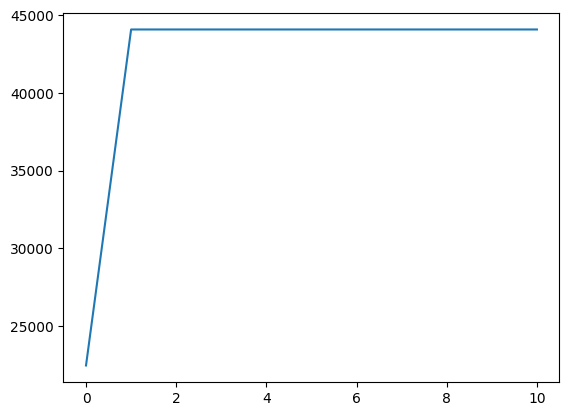

In [45]:
import matplotlib.pyplot as plt
y = [i['max'] for i in logbook]
plt.plot(range(len(y)), y)

In [46]:
best_solution = hof.items[0]
tc = 0.01

print("Buy and hold:",(1000/btc_ts1.iloc[0]['Open'])*btc_ts1.iloc[-1]['Open']*(1-tc)**2)
print("mtv         :",maximum_theoretical_value(btc_ts1))
print("strat value :",trading_strat(individual = best_solution, df=btc_ts1,pset=pset)[0])

Buy and hold: 107788.52041662957
mtv         : 1950319080593.2593
strat value : 90596.67088814286


In [67]:
best_solution

# signal_df  = pd.DataFrame(index=df.index)
# signal_df['Signal'] = function(df = df)
# signal_df["Open"] = df['Open']

<Axes: xlabel='Date'>

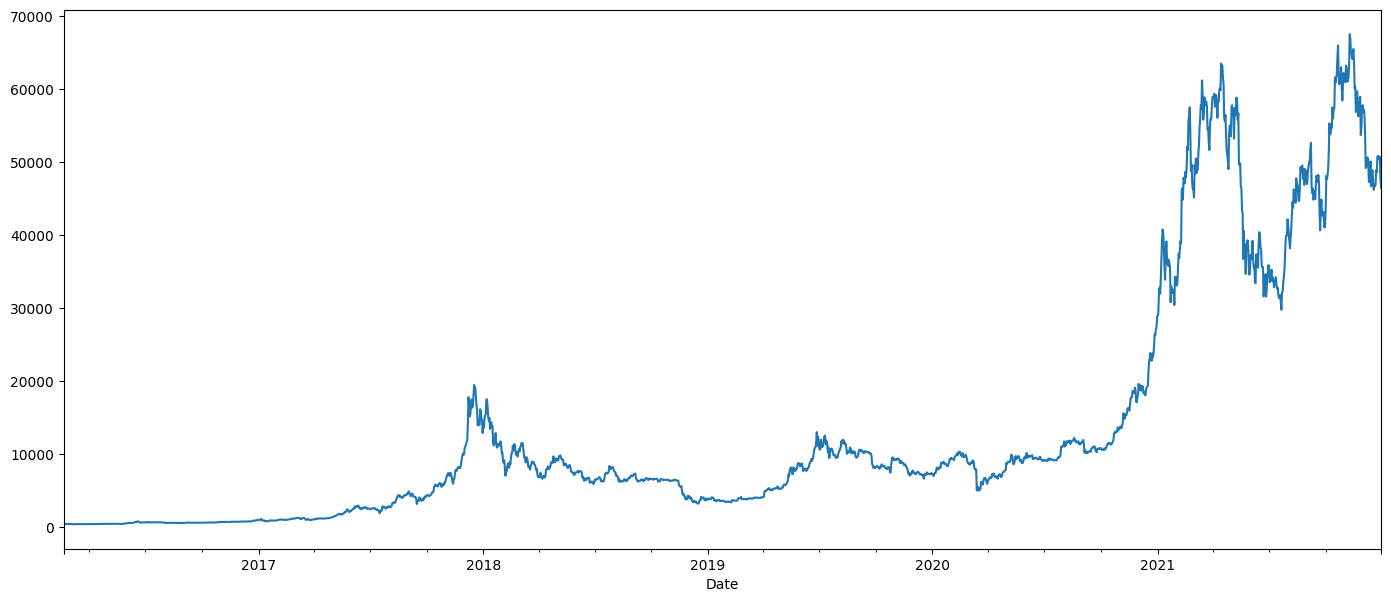

In [56]:
plt.figure()
btc_ts1["Open"].plot(figsize=(17,7))

In [53]:
btc_ts_open = btc_ts1['Open']
x = btc_ts_open.reset_index()['Open']

# Get peaks and troughs
peaks, _ = find_peaks(x)
troughs, _ = find_peaks(-x)

peaks_troughs = list(peaks)+list(troughs)
#Add the enedpoints to the local maximum and minimums.
if 0 not in peaks_troughs:
    peaks_troughs.append(0)
if len(btc_ts_open)-1 not in peaks_troughs:
    peaks_troughs.append(len(btc_ts_open)-1)

peaks_troughs = sorted(peaks_troughs)
peaks_troughs

#Work out maximum theoretical value using an initial investement of $1000 by default.
profit=0
val = 1000
no_tc_val = 1000
for ind,price in enumerate(btc_ts_open.iloc[peaks_troughs]):
    if ind>1 and price > btc_ts_open.iloc[peaks_troughs].iloc[ind-1]:
        # Calculate 
        pot_val= (val*price/btc_ts_open.iloc[peaks_troughs].iloc[ind-1])*(1-tc)**2
        if pot_val>val:
            val=pot_val        
# no_tc
if ind>1 and price > btc_ts_open.iloc[peaks_troughs].iloc[ind-1]:
    no_tc_val = (no_tc_val*price/btc_ts_open.iloc[peaks_troughs].iloc[ind-1])

val

np.float64(1950319080593.2593)